In [121]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns

In [149]:


# Try using a different encoding
df = pd.read_csv('../data/Twitch_game_data.csv')





UnicodeDecodeError: 'utf-8' codec can't decode byte 0x96 in position 42585: invalid start byte

In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Rank              21000 non-null  int64         
 1   Game              20999 non-null  object        
 2   Month             21000 non-null  int64         
 3   Year              21000 non-null  int64         
 4   Hours_watched     21000 non-null  int64         
 5   Hours_streamed    21000 non-null  int64         
 6   Peak_viewers      21000 non-null  int64         
 7   Peak_channels     21000 non-null  int64         
 8   Streamers         21000 non-null  int64         
 9   Avg_viewers       21000 non-null  int64         
 10  Avg_channels      21000 non-null  int64         
 11  Avg_viewer_ratio  21000 non-null  float64       
 12  Date              21000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(10), object(1)
memory usage: 2.1+ MB

In [129]:
df.head()

,Rank,Game,Month,Year,Hours_watched,Hours_streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio,Date
0,1,League of Legends,1,2016,94377226,1362044,530270,2903,129172,127021,1833,69.29,2016-01-01
1,2,Counter-Strike: Global Offensive,1,2016,47832863,830105,372654,2197,120849,64378,1117,57.62,2016-01-01
2,3,Dota 2,1,2016,45185893,433397,315083,1100,44074,60815,583,104.26,2016-01-01
3,4,Hearthstone,1,2016,39936159,235903,131357,517,36170,53749,317,169.29,2016-01-01
4,5,Call of Duty: Black Ops III,1,2016,16153057,1151578,71639,3620,214054,21740,1549,14.03,2016-01-01


In [72]:
df.describe()

,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained
count,1.000000e+03,1000.000000,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03
mean,4.184279e+08,120515.160000,37065.051000,4781.040000,5.700541e+05,2.055185e+05,1.166817e+07
std,5.496355e+08,85376.201364,60314.307686,8453.684965,8.044134e+05,3.399137e+05,2.490572e+07
min,1.221928e+08,3465.000000,496.000000,235.000000,3.660000e+03,-1.577200e+04,1.757880e+05
25%,1.631899e+08,73758.750000,9113.750000,1457.750000,1.705462e+05,4.375825e+04,3.880602e+06
50%,2.349908e+08,108240.000000,16676.000000,2425.000000,3.180630e+05,9.835200e+04,6.456324e+06
75%,4.337399e+08,141843.750000,37569.750000,4786.250000,6.243322e+05,2.361308e+05,1.219676e+07
max,6.196162e+09,521445.000000,639375.000000,147643.000000,8.938903e+06,3.966525e+06,6.701375e+08


In [132]:
top_games = df.sort_values(by="Hours_watched", ascending=False).head(10)



# Print top games
print(top_games[["Game", "Hours_watched"]])

                Game  Hours_watched
10200       VALORANT      344551979
18000  Just Chatting      290887077
12600  Just Chatting      289547911
12800  Just Chatting      285948196
14400  Just Chatting      283669656
15000  Just Chatting      282771829
15200  Just Chatting      274748231
17200  Just Chatting      274027644
19200  Just Chatting      273155353
14200  Just Chatting      271538951


In [133]:
total_streamers = df.groupby('Game')['Streamers'].sum().sort_values(ascending=False).head(10)




### Step 2: Streamers Over Time ###
# Create a 'Date' column for time analysis
df['Date'] = pd.to_datetime(df[['Year', 'Month']].assign(DAY=1))

# Filter data for the top 10 games
top_10_games = total_streamers.index
filtered_data = df[df['Game'].isin(top_10_games)]

# Group by Date and Game to calculate streamers over time
streamers_over_time = filtered_data.groupby(['Date', 'Game'])['Streamers'].sum().reset_index()



In [134]:
df.head()

,Rank,Game,Month,Year,Hours_watched,Hours_streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio,Date
0,1,League of Legends,1,2016,94377226,1362044,530270,2903,129172,127021,1833,69.29,2016-01-01
1,2,Counter-Strike: Global Offensive,1,2016,47832863,830105,372654,2197,120849,64378,1117,57.62,2016-01-01
2,3,Dota 2,1,2016,45185893,433397,315083,1100,44074,60815,583,104.26,2016-01-01
3,4,Hearthstone,1,2016,39936159,235903,131357,517,36170,53749,317,169.29,2016-01-01
4,5,Call of Duty: Black Ops III,1,2016,16153057,1151578,71639,3620,214054,21740,1549,14.03,2016-01-01


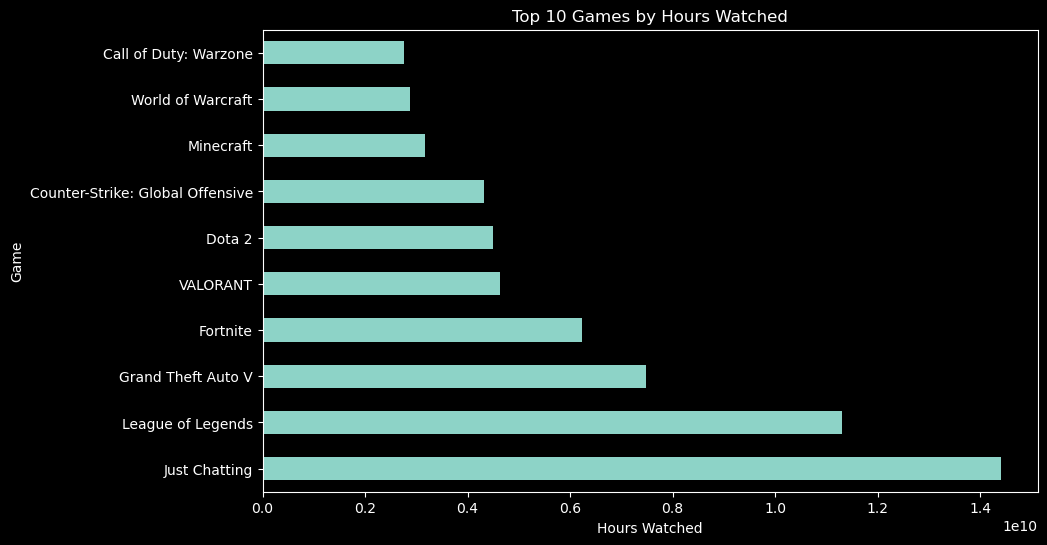

In [135]:


# Top 10 games by Hours Watched, sorted in descending order
top_games = df.groupby('Game')['Hours_watched'].sum().sort_values(ascending=False).head(10)

# Plot the top games in a horizontal bar chart
top_games.plot(kind='barh', figsize=(10, 6))

# Set the plot title and labels
plt.title('Top 10 Games by Hours Watched')
plt.xlabel('Hours Watched')
plt.ylabel('Game')

# Show the plot
plt.show()



In [136]:
# Calculate the top 10 games by total Hours Watched
top_games = (
    df.groupby('Game')['Hours_watched']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

# Print the top 10 games with their hours watched
print("Top 10 Games by Hours Watched:")
for game, hours in top_games.items():
    print(f"{game}: {hours} Hours")


Top 10 Games by Hours Watched:
Just Chatting: 14397469625 Hours
League of Legends: 11296781271 Hours
Grand Theft Auto V: 7482026514 Hours
Fortnite: 6224642826 Hours
VALORANT: 4631862775 Hours
Dota 2: 4503767707 Hours
Counter-Strike: Global Offensive: 4315553263 Hours
Minecraft: 3162054933 Hours
World of Warcraft: 2870508014 Hours
Call of Duty: Warzone: 2764017645 Hours


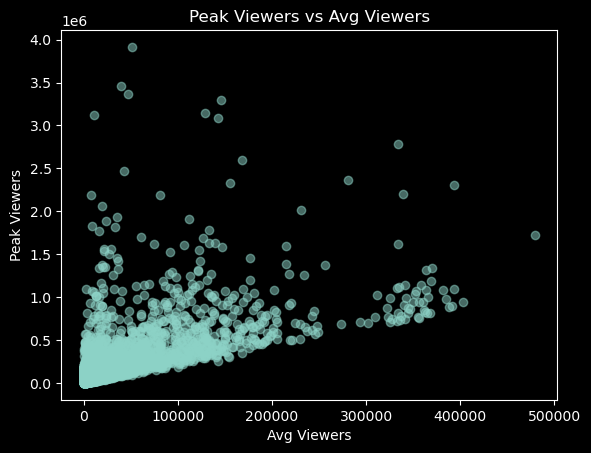

In [137]:
plt.scatter(df['Avg_viewers'], df['Peak_viewers'], alpha=0.5)
plt.title('Peak Viewers vs Avg Viewers')
plt.xlabel('Avg Viewers')
plt.ylabel('Peak Viewers')
plt.show()


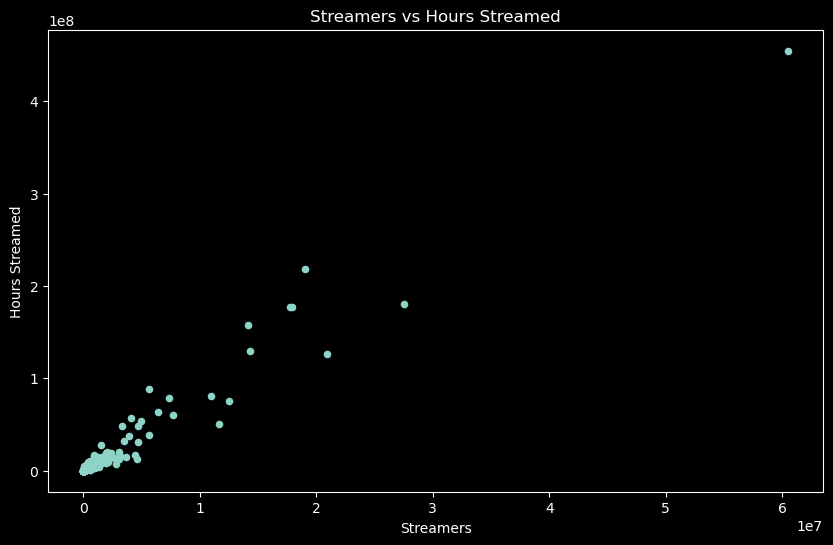

In [93]:
df.groupby('Game')[['Streamers', 'Hours_streamed']].sum().plot(kind='scatter', x='Streamers', y='Hours_streamed', figsize=(10, 6))
plt.title('Streamers vs Hours Streamed')
plt.xlabel('Streamers')
plt.ylabel('Hours Streamed')
plt.show()


In [95]:

print(df.shape)


(21000, 12)


In [97]:
# Get unique values in the Year column
print(df['Year'].unique())


[2016 2017 2018 2019 2020 2021 2022 2023 2024]


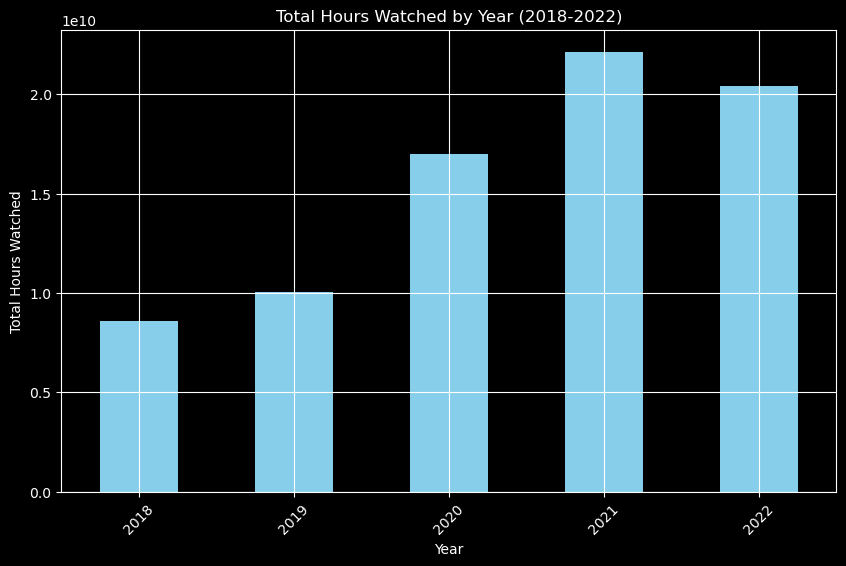

In [105]:

# Filter for years 2018-2022
df_filtered = df[(df['Year'] >= 2018) & (df['Year'] <= 2022)]

# Group by Year and sum Hours Watched
yearly_data = df_filtered.groupby('Year')['Hours_watched'].sum()

# Plot
yearly_data.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Total Hours Watched by Year (2018-2022)')
plt.xlabel('Year')
plt.ylabel('Total Hours Watched')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


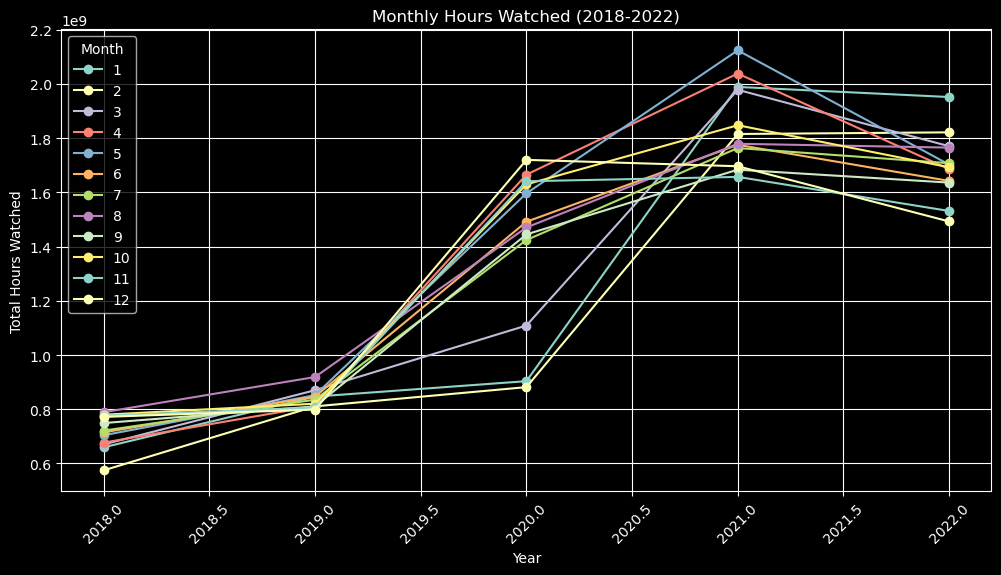

In [106]:
monthly_data = df_filtered.groupby(['Year', 'Month'])['Hours_watched'].sum().unstack()

# Plot the data
monthly_data.plot(kind='line', figsize=(12, 6), marker='o')

# Set plot title and labels
plt.title('Monthly Hours Watched (2018-2022)')
plt.xlabel('Year')
plt.ylabel('Total Hours Watched')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

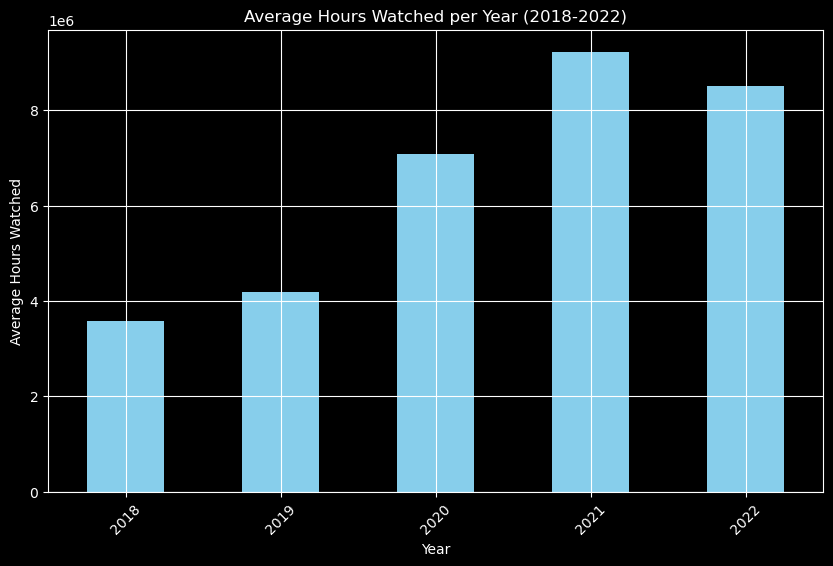

In [107]:



avg_watch_time_per_year = df_filtered.groupby('Year')['Hours_watched'].mean()

# Plot the average watch time per year
avg_watch_time_per_year.plot(kind='bar', figsize=(10, 6), color='skyblue')

# Set plot title and labels
plt.title('Average Hours Watched per Year (2018-2022)')
plt.xlabel('Year')
plt.ylabel('Average Hours Watched')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


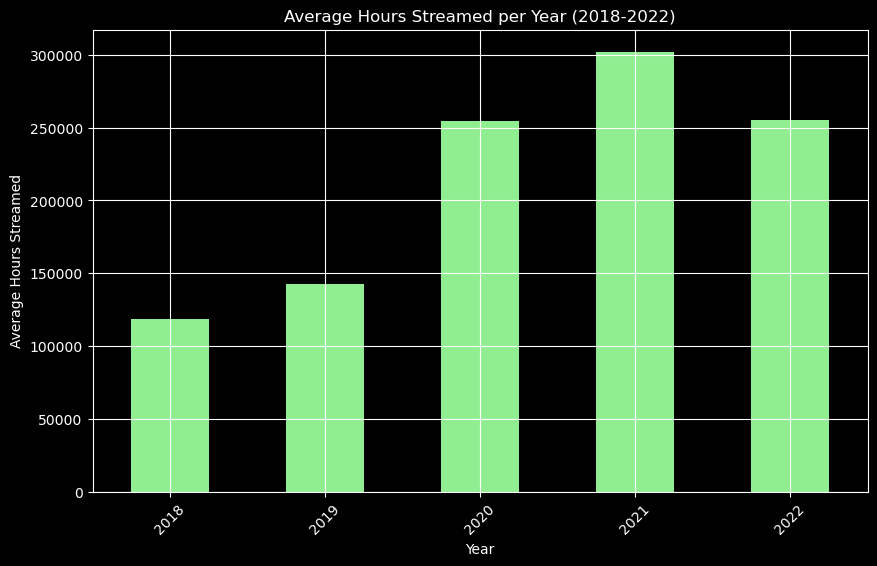

In [109]:
# Group by Year and calculate average Hours Streamed
avg_streamed_hours_per_year = df_filtered.groupby('Year')['Hours_streamed'].mean()

# Plot the average streamed hours per year
avg_streamed_hours_per_year.plot(kind='bar', figsize=(10, 6), color='lightgreen')

# Set plot title and labels
plt.title('Average Hours Streamed per Year (2018-2022)')
plt.xlabel('Year')
plt.ylabel('Average Hours Streamed')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()